### Imports

In [1]:
import sys
sys.version

'3.8.12 (default, Oct 12 2021, 13:49:34) \n[GCC 7.5.0]'

In [2]:
from collections import Counter
import pandas as pd
import pandas_schema
from pandas_schema import Column
from pandas_schema.validation import CustomElementValidation
from decimal import *
import numpy as np
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from pandas_profiling import ProfileReport
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read csv. files

In [3]:
df_original = pd.read_csv('original_dataset.csv', index_col = 'Code')
df_excluded = pd.read_csv('df_excluded_samples.csv', index_col = 'Code')
df_included = pd.read_csv('df_included_samples.csv', index_col = 'Code')

In [4]:
df_included = df_included[['Race','Gender',
                           'ADOS_Sev','ADIR_quot',
                           'Dysmorphysm','Language_Regr',
                           'Audition', 'Vision','Verbal',
                           'Psyc_Family_Hist','PMD_Regression','PMD_Delay',
                           'HC','Apgar_1', 'Apgar_5',
                           'Diag_Age','Walk_Age','First_Words_Age','First_Phrases_Age',
                           'ADIR_Soc', 'ADIR_RRB', 'ADIR_AbDev',
                           'VABS_Com', 'VABS_Soc', 'VABS_Aut',
                           'QD_M', 'QD_PS', 'QD_L', 'QD_EH', 'QD_R']].copy()

In [55]:
df_included

,Race,Gender,ADOS_Sev,ADIR_quot,Dysmorphysm,Language_Regr,Audition,Vision,Verbal,Psyc_Family_Hist,...,ADIR_RRB,ADIR_AbDev,VABS_Com,VABS_Soc,VABS_Aut,QD_M,QD_PS,QD_L,QD_EH,QD_R
Code,,,,,,,,,,,,,,,,,,,,,
AA1,White,F,NaN,Positive,No,No,Normal,Normal,No,Yes,...,9.0,2.0,NaN,NaN,NaN,47.0,35.0,13.0,28.0,38.0
AA34,White,M,NaN,Positive,No,No,Normal,Normal,No,No,...,8.0,5.0,NaN,NaN,NaN,43.0,27.0,18.0,25.0,31.0
AA36,White,M,NaN,Positive,No,No,Abnormal,Normal,No,Yes,...,8.0,5.0,NaN,NaN,NaN,52.0,35.0,8.0,31.0,45.0
AA72,White,F,NaN,Positive,Yes,No,Normal,Normal,No,Yes,...,4.0,5.0,NaN,NaN,NaN,29.0,21.0,23.0,21.0,20.0
AA91,White,M,NaN,Positive,No,No,Normal,Normal,No,No,...,8.0,4.0,NaN,NaN,NaN,28.0,19.0,11.0,18.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AA927,White,M,NaN,Positive,No,Yes,Normal,Normal,NaN,Yes,...,NaN,NaN,79.0,74.0,79.0,76.0,55.0,84.0,81.0,84.0
AA938,White,M,Autism,Positive,NaN,No,NaN,NaN,No,Yes,...,3.0,NaN,78.0,68.0,77.0,97.0,73.0,65.0,77.0,97.0
AA934,White,M,Autism,Positive,No,Yes,Normal,Normal,Yes,No,...,3.0,25.0,47.0,63.0,55.0,58.0,40.0,20.0,31.0,34.0


In [6]:
df_excluded = df_excluded[['Race','Gender',
                           'ADOS_Sev','ADIR_quot',
                           'Dysmorphysm','Language_Regr',
                           'Audition', 'Vision','Verbal',
                           'Psyc_Family_Hist','PMD_Regression','PMD_Delay',
                           'HC','Apgar_1', 'Apgar_5',
                           'Diag_Age','Walk_Age','First_Words_Age','First_Phrases_Age',
                           'ADIR_Soc', 'ADIR_RRB', 'ADIR_AbDev',
                           'VABS_Com', 'VABS_Soc', 'VABS_Aut',
                           'QD_M', 'QD_PS', 'QD_L', 'QD_EH', 'QD_R']].copy()

### Data Visualization

#### VABS Histogram

array([[<AxesSubplot:title={'center':'VABS_Com'}>,
        <AxesSubplot:title={'center':'VABS_Aut'}>],
       [<AxesSubplot:title={'center':'VABS_Soc'}>, <AxesSubplot:>]],
      dtype=object)

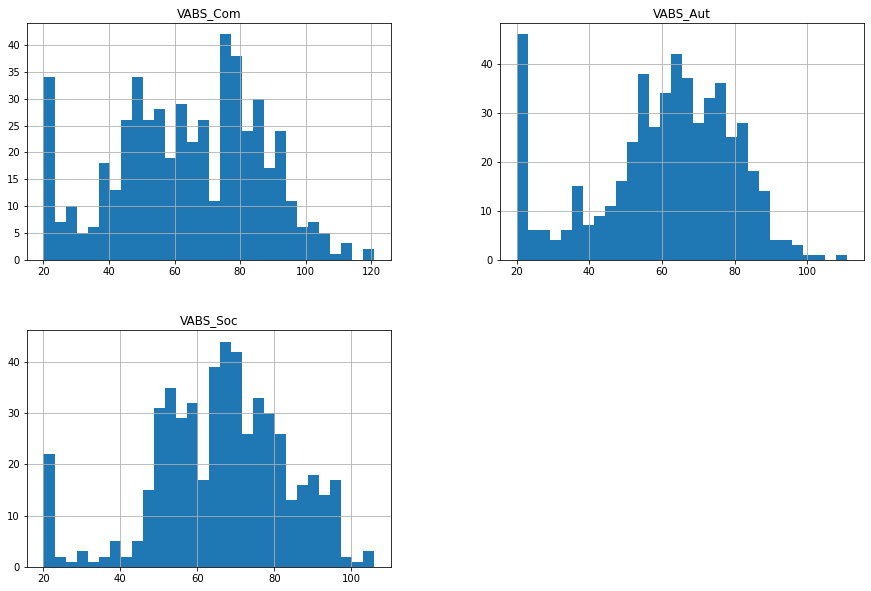

In [7]:
df_included[['VABS_Com','VABS_Aut','VABS_Soc']].hist(bins=30, figsize=(15, 10))

#### VABS Boxplot

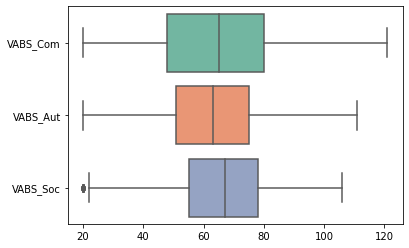

In [8]:
vabs_bx = sns.boxplot(data=df_included[['VABS_Com','VABS_Aut','VABS_Soc']], orient="h", palette="Set2")

#### ADIR Histogram

array([[<AxesSubplot:title={'center':'ADIR_Soc'}>,
        <AxesSubplot:title={'center':'ADIR_RRB'}>],
       [<AxesSubplot:title={'center':'ADIR_AbDev'}>, <AxesSubplot:>]],
      dtype=object)

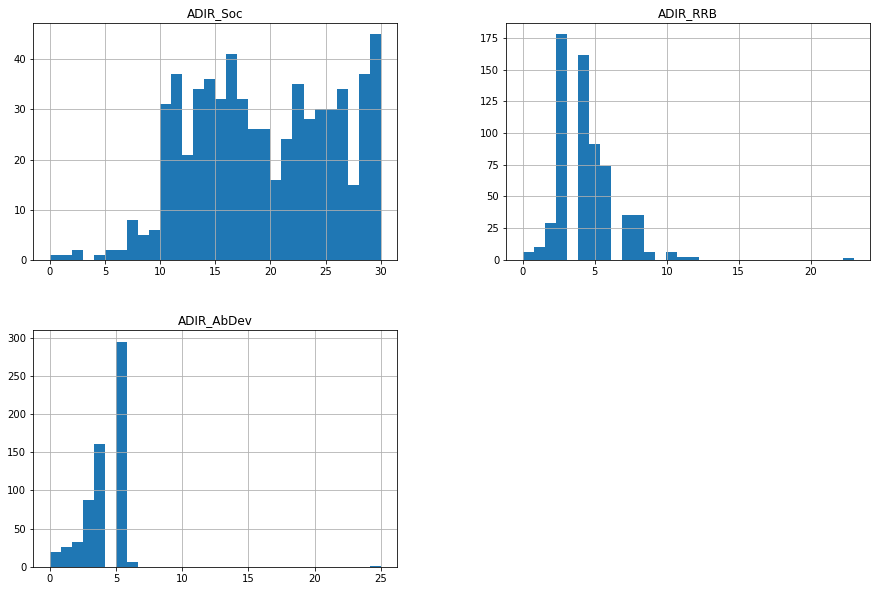

In [9]:
df_included[['ADIR_Soc','ADIR_RRB','ADIR_AbDev']].hist(bins=30, figsize=(15, 10))

#### ADIR Boxplot

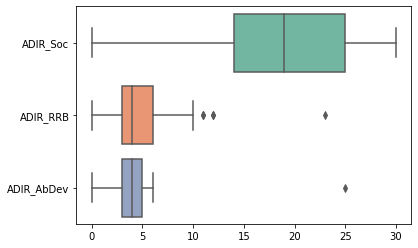

In [10]:
adir_box = sns.boxplot(data=df_included[['ADIR_Soc','ADIR_RRB','ADIR_AbDev']], orient="h", palette="Set2")

#### QD Histogram

array([[<AxesSubplot:title={'center':'QD_M'}>,
        <AxesSubplot:title={'center':'QD_PS'}>],
       [<AxesSubplot:title={'center':'QD_L'}>,
        <AxesSubplot:title={'center':'QD_EH'}>],
       [<AxesSubplot:title={'center':'QD_R'}>, <AxesSubplot:>]],
      dtype=object)

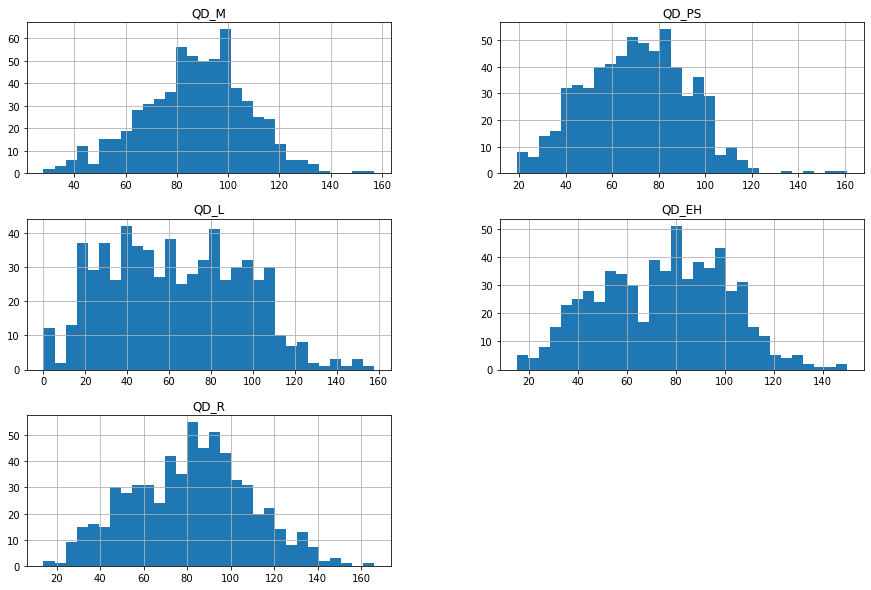

In [11]:
df_included[['QD_M', 'QD_PS','QD_L', 'QD_EH', 'QD_R']].hist(bins=30, figsize=(15, 10))

#### QD Boxplot

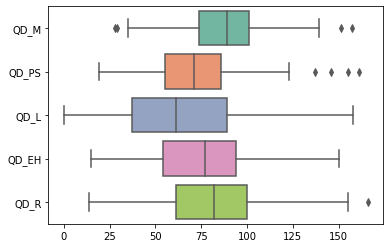

In [12]:
qd_box = sns.boxplot(data=df_included[['QD_M', 'QD_PS','QD_L', 'QD_EH', 'QD_R']], orient="h", palette="Set2")

#### Walk Age, First Words Age and First Phrases Age Histogram

array([[<AxesSubplot:title={'center':'Walk_Age'}>,
        <AxesSubplot:title={'center':'First_Words_Age'}>],
       [<AxesSubplot:title={'center':'First_Phrases_Age'}>,
        <AxesSubplot:>]], dtype=object)

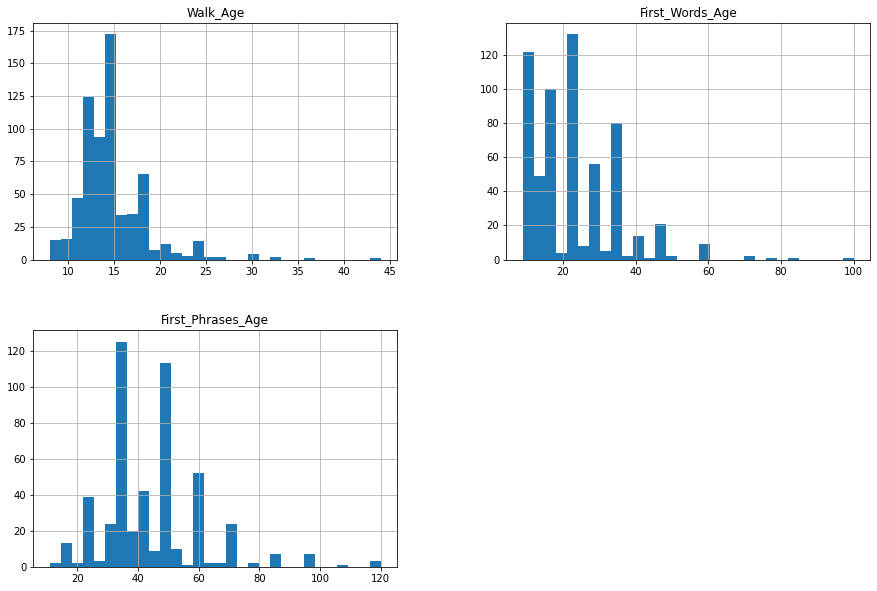

In [13]:
df_included[['Walk_Age', 'First_Words_Age','First_Phrases_Age']].hist(bins=30, figsize=(15, 10))

#### Walk Age, First Words Age and First Phrases Age Boxplot

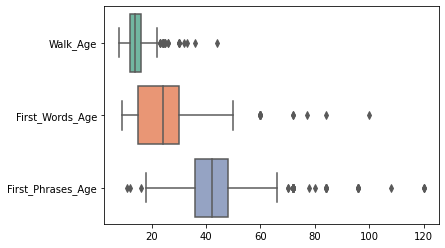

In [14]:
ages_box = sns.boxplot(data=df_included[['Walk_Age', 'First_Words_Age','First_Phrases_Age']], orient="h", palette="Set2")

#### Diagnostic Age Histogram

array([[<AxesSubplot:title={'center':'Diag_Age'}>]], dtype=object)

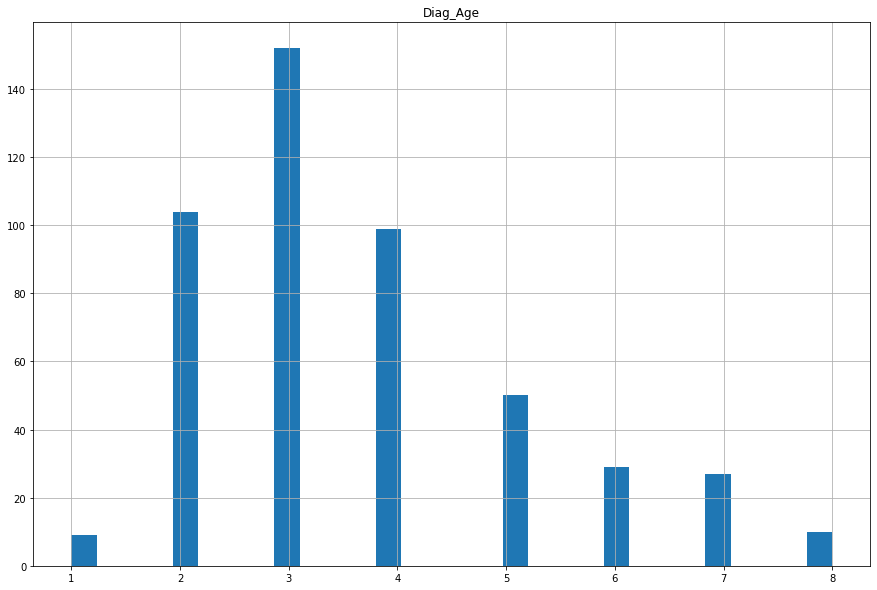

In [15]:
df_included[['Diag_Age']].hist(bins=30, figsize=(15, 10))

#### Diagnostic Age Boxplot

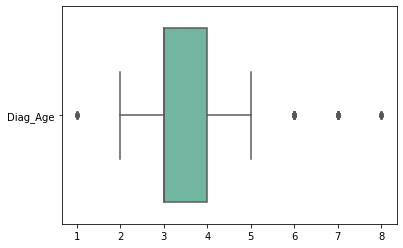

In [16]:
age_box = sns.boxplot(data=df_included[['Diag_Age']], orient="h", palette="Set2")

#### Apgar Histogram

array([[<AxesSubplot:title={'center':'Apgar_1'}>,
        <AxesSubplot:title={'center':'Apgar_5'}>]], dtype=object)

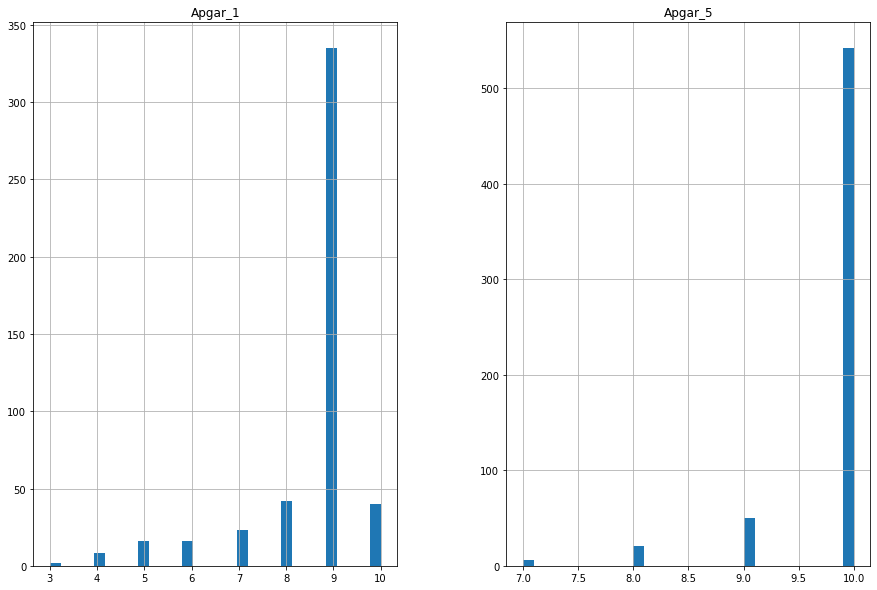

In [17]:
df_included[['Apgar_1','Apgar_5']].hist(bins=30, figsize=(15, 10))

#### Apgar Boxplot

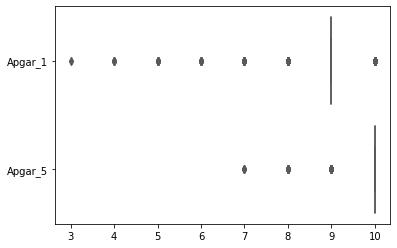

In [18]:
apgar_box = sns.boxplot(data=df_included[['Apgar_1','Apgar_5']], orient="h", palette="Set2")

#### Head Circumference Histogram

array([[<AxesSubplot:title={'center':'HC'}>]], dtype=object)

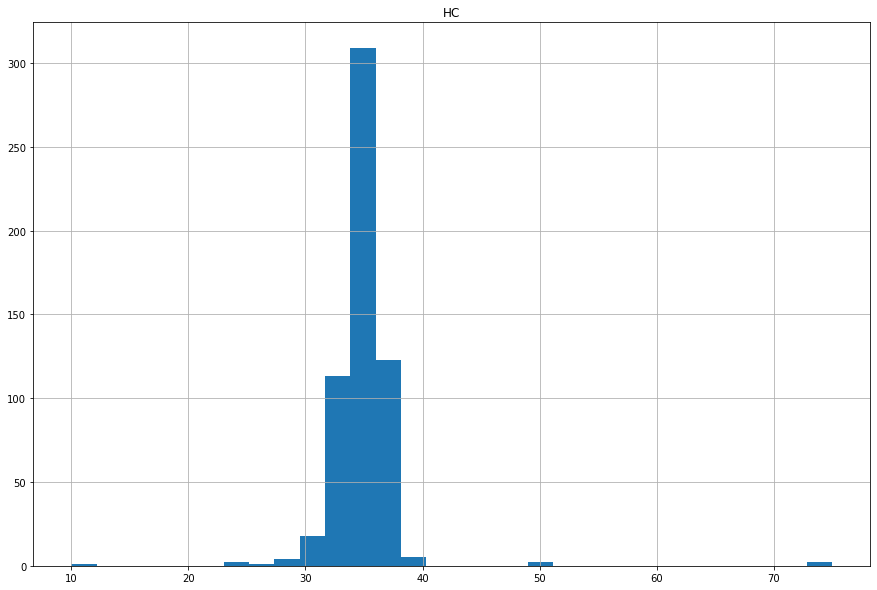

In [19]:
df_included[['HC']].hist(bins=30, figsize=(15, 10))

#### Head Circumference Boxplot

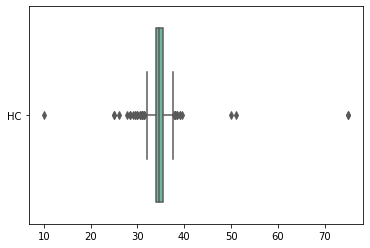

In [20]:
hc_box = sns.boxplot(data=df_included[['HC']], orient="h", palette="Set2")

### Numeric Variables Statistics

In [21]:
statistics_df_included = df_included.describe()
statistics_df_included

,HC,Apgar_1,Apgar_5,Diag_Age,Walk_Age,First_Words_Age,First_Phrases_Age,ADIR_Soc,ADIR_RRB,ADIR_AbDev,VABS_Com,VABS_Soc,VABS_Aut,QD_M,QD_PS,QD_L,QD_EH,QD_R
count,580.000000,482.000000,619.000000,480.000000,655.000000,610.000000,503.000000,638.000000,637.000000,629.000000,524.000000,526.000000,524.000000,628.000000,628.000000,640.000000,628.000000,628.000000
mean,34.696724,8.560166,9.822294,3.670833,14.617557,24.265574,44.753479,18.973354,4.485086,4.027027,63.797710,66.184411,60.465649,87.171178,70.348726,63.007812,74.623408,81.782643
std,3.236073,1.250991,0.522089,1.560199,3.756838,12.030542,16.246939,6.519930,2.000436,1.562162,22.345221,17.543150,19.400104,20.601476,22.227945,32.093600,25.984113,27.320170
min,10.000000,3.000000,7.000000,1.000000,8.000000,9.000000,11.000000,0.000000,0.000000,0.000000,20.000000,20.000000,20.000000,28.000000,19.000000,0.000000,15.000000,14.000000
25%,34.000000,9.000000,10.000000,3.000000,12.000000,15.000000,36.000000,14.000000,3.000000,3.000000,48.000000,55.000000,51.000000,74.000000,55.000000,37.000000,54.000000,61.000000
50%,34.500000,9.000000,10.000000,3.000000,14.000000,24.000000,42.000000,19.000000,4.000000,4.000000,65.000000,67.000000,63.000000,89.000000,71.000000,61.000000,77.000000,82.000000
75%,35.500000,9.000000,10.000000,4.000000,16.000000,30.000000,48.000000,25.000000,6.000000,5.000000,80.000000,78.000000,75.000000,101.000000,86.000000,89.000000,94.250000,100.000000
max,75.000000,10.000000,10.000000,8.000000,44.000000,100.000000,120.000000,30.000000,23.000000,25.000000,121.000000,106.000000,111.000000,157.000000,161.000000,158.000000,150.000000,166.000000


In [22]:
statistics_df_excluded = df_excluded.describe()
statistics_df_excluded

,HC,Apgar_1,Apgar_5,Diag_Age,Walk_Age,First_Words_Age,First_Phrases_Age,ADIR_Soc,ADIR_RRB,ADIR_AbDev,VABS_Com,VABS_Soc,VABS_Aut,QD_M,QD_PS,QD_L,QD_EH,QD_R
count,256.000000,247.000000,312.000000,188.000000,353.000000,332.000000,270.000000,287.000000,287.000000,276.000000,191.000000,191.000000,191.000000,256.000000,256.000000,255.000000,256.000000,256.000000
mean,34.530078,8.631579,9.823718,6.611702,15.566572,26.018072,43.344444,16.198606,4.111498,3.786232,67.251309,71.434555,66.890052,81.342969,68.406641,61.244314,71.271094,78.201953
std,2.332211,1.330495,0.535866,3.621574,5.764479,15.351264,18.218517,9.311561,2.768726,1.442709,19.147342,16.151085,18.394320,28.090968,27.785430,34.008386,28.770276,32.901806
min,25.000000,1.000000,6.000000,1.000000,9.000000,8.000000,12.000000,0.000000,0.000000,0.000000,20.000000,20.000000,20.000000,23.000000,17.000000,4.000000,17.000000,21.000000
25%,33.500000,9.000000,10.000000,3.000000,12.000000,15.000000,32.250000,9.000000,2.000000,3.000000,54.000000,60.000000,58.500000,57.000000,44.000000,37.500000,49.500000,46.000000
50%,34.500000,9.000000,10.000000,6.000000,14.000000,24.000000,36.000000,16.000000,4.000000,4.000000,70.000000,72.000000,68.000000,85.000000,68.000000,59.000000,74.500000,78.500000
75%,35.500000,9.000000,10.000000,10.000000,17.000000,36.000000,48.000000,24.500000,6.000000,5.000000,80.000000,84.000000,80.000000,103.000000,90.000000,81.000000,92.000000,103.000000
max,55.000000,10.000000,10.000000,18.000000,60.000000,120.000000,120.000000,30.000000,13.000000,5.000000,118.000000,110.000000,104.000000,145.000000,129.000000,170.000000,147.000000,156.000000


In [23]:
# calculate mean and sd for variables of interest 
included_ms = statistics_df_included.loc[["mean", 'std'], :].transpose().apply(lambda x: "{} ({})".format(x['mean'].round(2), x['std'].round(2)), axis=1)

In [24]:
# calculate mean and sd for variables of interest 
excluded_ms = statistics_df_excluded.loc[["mean", 'std'], :].transpose().apply(lambda x: "{} ({})".format(x['mean'].round(2), x['std'].round(2)), axis=1)

In [25]:
# vizualize mean and sd of the two populations (dataframes)
dataframes = [included_ms, excluded_ms]
concat_df = pd.concat(dataframes, axis = 1)

In [26]:
concat_df.columns = ['Included', 'Excluded']

In [27]:
# vizualize mean and sd of the two populations (dataframes)
concat_df

,Included,Excluded
HC,34.7 (3.24),34.53 (2.33)
Apgar_1,8.56 (1.25),8.63 (1.33)
Apgar_5,9.82 (0.52),9.82 (0.54)
Diag_Age,3.67 (1.56),6.61 (3.62)
Walk_Age,14.62 (3.76),15.57 (5.76)
First_Words_Age,24.27 (12.03),26.02 (15.35)
First_Phrases_Age,44.75 (16.25),43.34 (18.22)
ADIR_Soc,18.97 (6.52),16.2 (9.31)
ADIR_RRB,4.49 (2.0),4.11 (2.77)
ADIR_AbDev,4.03 (1.56),3.79 (1.44)


### Number of samples for each variable

In [28]:
len(df_included)

661

In [29]:
df_included.count()

Race                 657
Gender               661
ADOS_Sev             557
ADIR_quot            643
Dysmorphysm          639
Language_Regr        625
Audition             638
Vision               602
Verbal               638
Psyc_Family_Hist     648
PMD_Regression       619
PMD_Delay            642
HC                   580
Apgar_1              482
Apgar_5              619
Diag_Age             480
Walk_Age             655
First_Words_Age      610
First_Phrases_Age    503
ADIR_Soc             638
ADIR_RRB             637
ADIR_AbDev           629
VABS_Com             524
VABS_Soc             526
VABS_Aut             524
QD_M                 628
QD_PS                628
QD_L                 640
QD_EH                628
QD_R                 628
dtype: int64

In [30]:
len(df_excluded)

356

In [31]:
df_excluded.count()

Race                 354
Gender               356
ADOS_Sev             233
ADIR_quot            291
Dysmorphysm          319
Language_Regr        338
Audition             321
Vision               310
Verbal               164
Psyc_Family_Hist     347
PMD_Regression       341
PMD_Delay            338
HC                   256
Apgar_1              247
Apgar_5              312
Diag_Age             188
Walk_Age             353
First_Words_Age      332
First_Phrases_Age    270
ADIR_Soc             287
ADIR_RRB             287
ADIR_AbDev           276
VABS_Com             191
VABS_Soc             191
VABS_Aut             191
QD_M                 256
QD_PS                256
QD_L                 255
QD_EH                256
QD_R                 256
dtype: int64

### Mann Wihtineyu Test for Numeric Variables 

In [32]:
# Mann Witneyu test
for t in ['VABS_Com','VABS_Aut','VABS_Soc',
          'ADIR_Soc','ADIR_RRB','ADIR_AbDev',
          'QD_M', 'QD_PS','QD_L', 'QD_EH','QD_R',
          'Diag_Age']:
    pvalue = stats.mannwhitneyu(df_included[t].dropna(), df_excluded[t].dropna())
    print(t)
    print("statistics:", pvalue[0], "p_value:", (pvalue[1]).round(4))
    print("")

VABS_Com
statistics: 46042.5 p_value: 0.1017

VABS_Aut
statistics: 40396.5 p_value: 0.0001

VABS_Soc
statistics: 42380.0 p_value: 0.0014

ADIR_Soc
statistics: 105834.5 p_value: 0.0001

ADIR_RRB
statistics: 99006.0 p_value: 0.0399

ADIR_AbDev
statistics: 92902.0 p_value: 0.0729

QD_M
statistics: 88004.0 p_value: 0.0269

QD_PS
statistics: 83776.5 p_value: 0.3245

QD_L
statistics: 85787.5 p_value: 0.2303

QD_EH
statistics: 85751.0 p_value: 0.1191

QD_R
statistics: 85441.5 p_value: 0.1419

Diag_Age
statistics: 23333.5 p_value: 0.0



### Contigency/Frequency Tables and Fisher Test for Categorical Variables

In [33]:
# number of females and males in data included
df_included['Gender'].value_counts()

M    586
F     75
Name: Gender, dtype: int64

In [34]:
# number of females and males in data excluded
df_excluded['Gender'].value_counts()

M    295
F     61
Name: Gender, dtype: int64

In [35]:
ci = Counter(df_included['Gender'])
ce = Counter(df_excluded['Gender'])

In [36]:
# sex contigency table 
ctable_sex = [[ci["M"], ce["M"]],
               [ci["F"], ce["F"]]]

In [37]:
# find proportions 
freq_sex = [[len(df_included[df_included.Gender == 'M'])/len(df_included.Gender), 
             len(df_excluded[df_excluded.Gender == 'M'])/len(df_excluded.Gender),
             len(df_included[df_included.Gender == 'F'])/len(df_included.Gender),
             len(df_excluded[df_excluded.Gender == 'F'])/len(df_excluded.Gender)]]
freq_sex 

[[0.886535552193646,
  0.8286516853932584,
  0.11346444780635401,
  0.17134831460674158]]

In [38]:
chi2_contingency(ctable_sex)

(6.201913162706191,
 0.012761230236009353,
 1,
 array([[572.60668633, 308.39331367],
        [ 88.39331367,  47.60668633]]))

In [39]:
# fisher test 
stats.fisher_exact(ctable_sex)

(1.6156384180790961, 0.011871333339651418)

In [40]:
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
stats = importr('stats')

In [41]:
# number of each race in data included
Counter(df_included.Race)

Counter({'White': 640, 'African American': 16, nan: 4, 'Asian': 1})

In [42]:
# number of each race in data excluded
Counter(df_excluded.Race)

Counter({'White': 349, 'African American': 5, nan: 2})

In [43]:
ci = Counter(df_included['Race'])
ce = Counter(df_excluded['Race'])

In [44]:
# race contigency table
ctable_race = np.array([[ci['White'], ce['White']],
                        [ci['African American'], ce['African American']],
                        [ci['Asian'], ce['Asian']]])

In [45]:
# find proportions 
freq_race = [[len(df_included[df_included.Race == 'White'])/df_included.Race.count(), 
             len(df_excluded[df_excluded.Race  == 'White'])/df_excluded.Race.count(),
             len(df_included[df_included.Race  == 'African American'])/df_included.Race.count(),
             len(df_excluded[df_excluded.Race  == 'African American'])/df_excluded.Race.count(),
             len(df_included[df_included.Race  == 'Asian'])/df_included.Race.count(),
             len(df_excluded[df_excluded.Race  == 'Asian'])/df_excluded.Race.count()]]
freq_race 

[[0.974124809741248,
  0.9858757062146892,
  0.0243531202435312,
  0.014124293785310734,
  0.0015220700152207,
  0.0]]

In [46]:
race_ft = stats.fisher_test(ctable_race)
print('p-value: {}'.format(race_ft[0][0]))

p-value: 0.58278154990688


In [47]:
chi2_contingency(ctable_race)

(1.730065093434809,
 0.4210378490044304,
 2,
 array([[6.42703264e+02, 3.46296736e+02],
        [1.36468843e+01, 7.35311573e+00],
        [6.49851632e-01, 3.50148368e-01]]))

In [48]:
# number of categories of ADOS severity in data included
df_included['ADOS_Sev'].value_counts()

Autism          443
ASD             108
Non Spectrum      6
Name: ADOS_Sev, dtype: int64

In [49]:
# number of categories of ADOS severity in data excluded
df_excluded['ADOS_Sev'].value_counts()

Autism          126
Non Spectrum     66
ASD              41
Name: ADOS_Sev, dtype: int64

In [50]:
ci = Counter(df_included['ADOS_Sev'])
ce = Counter(df_excluded['ADOS_Sev'])

In [51]:
# ADOS severity contigency table
ct_ados = np.array([[ci['Autism'], ce['Autism']],
               [ci['ASD'], ce['ASD']],
               [ci['Non Spectrum'], ce['Non Spectrum']]])

In [52]:
# find proportions 
freq_ados = [[len(df_included[df_included.ADOS_Sev == 'Autism'])/df_included.ADOS_Sev.count(), 
             len(df_excluded[df_excluded.ADOS_Sev  == 'Autism'])/df_excluded.ADOS_Sev.count(),
             len(df_included[df_included.ADOS_Sev  == 'ASD'])/df_included.ADOS_Sev.count(),
             len(df_excluded[df_excluded.ADOS_Sev  == 'ASD'])/df_excluded.ADOS_Sev.count(),
             len(df_included[df_included.ADOS_Sev  == 'Non Spectrum'])/df_included.ADOS_Sev.count(),
             len(df_excluded[df_excluded.ADOS_Sev  == 'Non Spectrum'])/df_excluded.ADOS_Sev.count()]]
freq_ados 

[[0.7953321364452424,
  0.5407725321888412,
  0.19389587073608616,
  0.1759656652360515,
  0.010771992818671455,
  0.2832618025751073]]

In [53]:
ados_ft = stats.fisher_test(ct_ados)
print('p-value: {}'.format(ados_ft[0][0]))

p-value: 3.259820771058504e-31


In [54]:
chi2_contingency(ct_ados)

(148.89805101107984,
 4.647282142622786e-33,
 2,
 array([[401.18101266, 167.81898734],
        [105.05443038,  43.94556962],
        [ 50.76455696,  21.23544304]]))